In [2]:
import Launch_simu as ls
import numpy as np
import matplotlib.pyplot as plt
import importlib


In [4]:
maxPktPerHour    = 50
stepPktPerHour   = 5
uniquePktPerHour = 10

maxSensingRadius  = 150
stepSensingRadius = 10
minSensingRadius  = 10

simulationTime = 3600
periodSenderUnique = 100
runs = 5

pktPerHour   = np.arange(1, maxPktPerHour, step= stepPktPerHour, dtype='float')
periodSender = 3600/pktPerHour
periodSenderU= 3600/uniquePktPerHour

SensingRadius= np.arange(minSensingRadius, maxSensingRadius, step= stepSensingRadius, dtype='float')

params = {
    'sensing_radius': [SensingRadius],
    'simulationTime': [simulationTime],#♣[round(i, 4) for i in periodSender],
    'radius': [1500],
    'appPeriod': [pktPerHour], #lambda p: ["aloha"] if p["radius"] == 0 else ["goursaud"],
    'logProfile': [0],
    'packetSize': [50],
    'maxReceptionPaths': [8],
}

Result_FileName = 'Test-sensing-LoRa-PktPerHour'
script = ['SensingGridLoRa','SensingGridLoRaPoisson']
get_AllRun=True

In [51]:
importlib.reload(ls)
ls.launch_simu(script[1], 
            params, 
            Result_FileName, 
            result_Header = 7,
            runs=runs, 
            optimized= True,
            show_progess=True,
            get_AllRun=get_AllRun,
            max_processes= 12,
            )

The script for the simulation is : /build/src/lorawan/examples/ns3-dev-SensingGridLoRaPoisson-optimized
Number of CPU on this machine   : 24
Number of CPU that will be used : 12


Running sim.: 100%|██████████| 700/700 [02:48<00:00,  4.16sim./s]

Execution time of the simulations is 168.47 [s]


In [5]:
Result_FileName_ToProcess = Result_FileName
params_values, Results = ls.get_Results(params,Result_FileName_ToProcess,get_AllRun=get_AllRun)
print(np.shape(Results))

ValueError: cannot reshape array of size 4900 into shape (14,1,1,10,1,1,1,7)

In [56]:
print(get_AllRun)

True


In [1]:
if get_AllRun : 
    n          = np.mean(Results[:,0,0,:,0,0,0,:,0],axis=2) 
    pktApp     = np.mean(Results[:,0,0,:,0,0,0,:,1],axis=2)
    pktDuty    = np.mean(Results[:,0,0,:,0,0,0,:,2],axis=2)
    pktSentP   = np.mean(Results[:,0,0,:,0,0,0,:,3],axis=2)
    pktNoDemod = np.mean(Results[:,0,0,:,0,0,0,:,4],axis=2)
    pktInterf  = np.mean(Results[:,0,0,:,0,0,0,:,5],axis=2)
    pktRecP    = np.mean(Results[:,0,0,:,0,0,0,:,6],axis=2)
else:
    n          = Results[:,0,0,:,0,0,0,0] 
    pktApp     = Results[:,0,0,:,0,0,0,1]
    pktDuty    = Results[:,0,0,:,0,0,0,2]
    pktSentP   = Results[:,0,0,:,0,0,0,3]
    pktNoDemod = Results[:,0,0,:,0,0,0,4]
    pktInterf  = Results[:,0,0,:,0,0,0,5]
    pktRecP    = Results[:,0,0,:,0,0,0,6]

fig, ax1 = plt.subplots(figsize=(15,9))
ax1.set_xlabel('Lambda [pkt/h]')
ax1.set_ylabel('Packet loss ratio at the network scale [%]')
for q in range(len(SensingRadius)):
    ax1.plot(pktPerHour,pktRecP[q,:]/pktSentP[q,:],  label = "SensingRadius= "+str(SensingRadius[q]))
ax1.grid()
ax1.grid()
ax1.tick_params(axis='y')
fig.legend()
plt.show()

fig, ax1 = plt.subplots(figsize=(15,9))
ax1.set_xlabel('Sensing radius [m]')
ax1.set_ylabel('Packet loss ratio at the network scale [%]')
for q in range(len(pktPerHour)):
    ax1.plot(SensingRadius,pktRecP[:,q]/pktSentP[:,q],  label = "Lambda= "+str(pktPerHour[q]))
ax1.grid()
ax1.grid()
ax1.tick_params(axis='y')
fig.legend()
plt.show()

NameError: name 'get_AllRun' is not defined

In [ ]:
if get_AllRun : 
    n          = np.mean(Results[:,0,0,0,0,0,0,:,0],axis=1) 
    pktApp     = np.mean(Results[:,0,0,0,0,0,0,:,1],axis=1)
    pktDuty    = np.mean(Results[:,0,0,0,0,0,0,:,2],axis=1)
    pktSentP   = np.mean(Results[:,0,0,0,0,0,0,:,3],axis=1)
    pktNoDemod = np.mean(Results[:,0,0,0,0,0,0,:,4],axis=1)
    pktInterf  = np.mean(Results[:,0,0,0,0,0,0,:,5],axis=1)
    pktRecP    = np.mean(Results[:,0,0,0,0,0,0,:,6],axis=1)
else:
    n          = Results[:,0,0,0,0,0,0,0] 
    pktApp     = Results[:,0,0,0,0,0,0,1]
    pktDuty    = Results[:,0,0,0,0,0,0,2]
    pktSentP   = Results[:,0,0,0,0,0,0,3]
    pktNoDemod = Results[:,0,0,0,0,0,0,4]
    pktInterf  = Results[:,0,0,0,0,0,0,5]
    pktRecP    = Results[:,0,0,0,0,0,0,6]

fig, ax1 = plt.subplots(figsize=(20,12))
color = 'tab:blue'
ax1.set_xlabel('Sensing radius [m]')
ax1.set_ylabel('Number of nodes', color=color)  # we already handled the x-label with ax1
ax1.plot(SensingRadius,n,color = color, label = "Number of nodes")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Number of packets received', color=color)
ax2.plot(SensingRadius,pktRecP/pktSentP,color = color,  label = "Number of packets received")
ax2.tick_params(axis='y', labelcolor=color)
fig.legend()
plt.show()

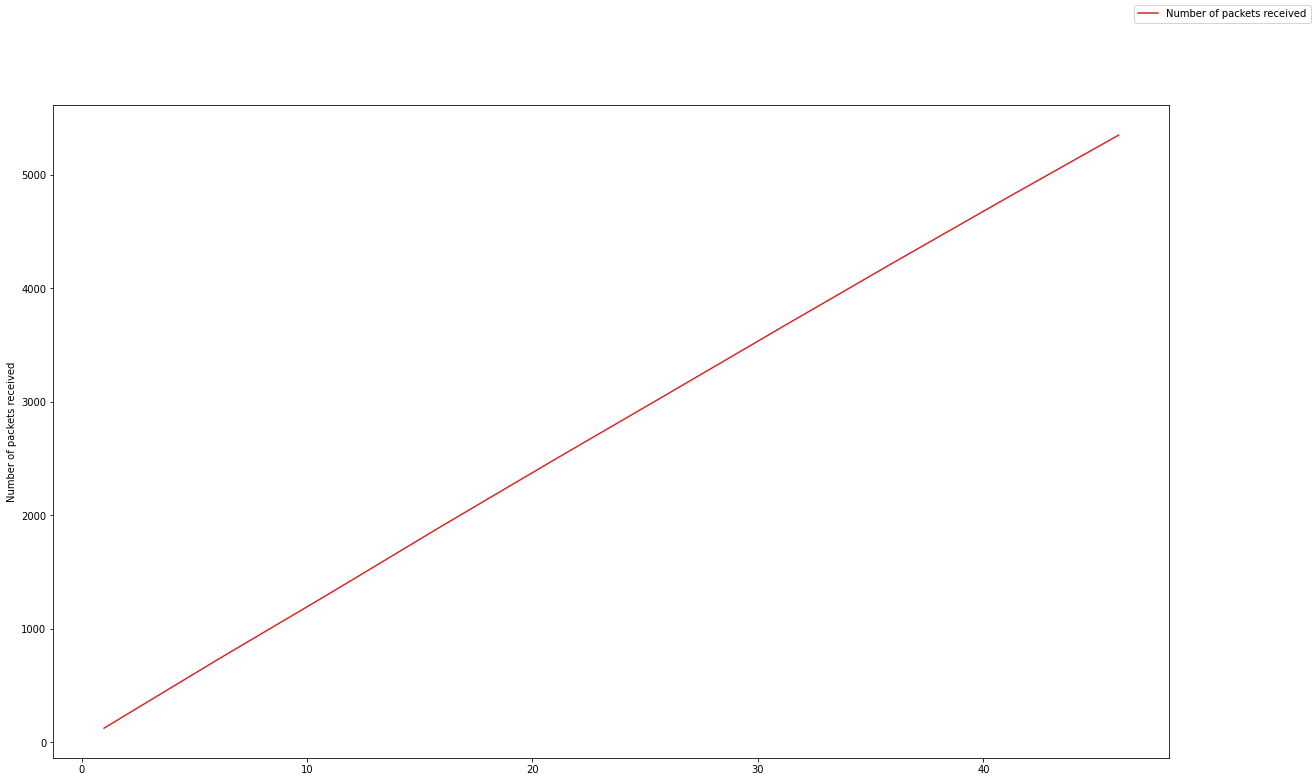

[ 125.    724.48 1311.24 1907.8  2492.88 3070.   3650.32 4224.92 4791.52
 5349.56]
[ 124.84  713.76 1275.   1832.24 2363.72 2875.04 3378.16 3862.08 4324.6
 4769.44]
[1.6000e-01 1.0720e+01 3.6240e+01 7.5560e+01 1.2916e+02 1.9496e+02
 2.7216e+02 3.6284e+02 4.6692e+02 5.8012e+02]


In [42]:
if get_AllRun : 
    n          = np.mean(Results[0,0,0,:,0,0,0,:,0],axis=1) 
    pktApp     = np.mean(Results[0,0,0,:,0,0,0,:,1],axis=1)
    pktDuty    = np.mean(Results[0,0,0,:,0,0,0,:,2],axis=1)
    pktSentP   = np.mean(Results[0,0,0,:,0,0,0,:,3],axis=1)
    pktNoDemod = np.mean(Results[0,0,0,:,0,0,0,:,4],axis=1)
    pktInterf  = np.mean(Results[0,0,0,:,0,0,0,:,5],axis=1)
    pktRecP    = np.mean(Results[0,0,0,:,0,0,0,:,6],axis=1)
else:
    n          = Results[0,0,0,:,0,0,0,0] 
    pktApp     = Results[0,0,0,:,0,0,0,1]
    pktDuty    = Results[0,0,0,:,0,0,0,2]
    pktSentP   = Results[0,0,0,:,0,0,0,3]
    pktNoDemod = Results[0,0,0,:,0,0,0,4]
    pktInterf  = Results[0,0,0,:,0,0,0,5]
    pktRecP    = Results[0,0,0,:,0,0,0,6]

fig, ax1 = plt.subplots(figsize=(20,12))

color = 'tab:red'
ax1.set_ylabel('Number of packets received')
ax1.plot(pktPerHour,pktSentP,color = color,  label = "Number of packets received")
ax1.tick_params(axis='y')
fig.legend()
plt.show()
print(pktSentP)
print(pktRecP)
print(pktInterf)